# Large Dataframe

### Elisa Seyfried, Individuelle Sprechstile, SS21

In the first cell all the necessary libraries are imported.

In [3]:
import os
import glob
from pathlib import Path
import numpy as np
import pandas as pd
import shutil
import sys
sys.path.append("./mld/src")
import midlevel_descriptors as mld
import matplotlib.pyplot as plt

SoX could not be found!

    If you do not have SoX, proceed here:
     - - - http://sox.sourceforge.net/ - - -

    If you do (or think that you should) have SoX, double-check your
    path variables.
    


load in_directory as Annotations

In [5]:
in_directory = './Annotations/'

The following cell copies all wav files in one directorty.

In [6]:
wav_sources = 'processed/'
wav_target = 'all_wavs'
for file in Path(wav_sources).rglob('*.wav'):
    if os.path.isfile(file):
        shutil.copy2(file, wav_target)

Looping over all files in the directory 'Annotations' and who end with .pkl. Create new data frame for all files.

In [7]:
df = pd.DataFrame()
audio_directory = 'all_wavs/' #loads files in directory all_wavs
for file in glob.glob(in_directory+'*.pkl'):
    print(file)
    df_tmp = pd.read_pickle(file)
    try:
        df_tmp['gender'] = df_tmp.sex #copies sex column in gender
        df_tmp = df_tmp.drop(columns=['sex']) #deletes sex column
    except (KeyError, AttributeError) as e:
        pass
    df_tmp.index = df_tmp.index.to_series().apply(lambda x: audio_directory+os.path.basename(x))
    df = df.append(df_tmp)

./Annotations\alexa.pkl
./Annotations\amthor.pkl
./Annotations\Apt.pkl
./Annotations\bartsch.pkl
./Annotations\Drosten.pkl
./Annotations\geliebte_anno.pkl
./Annotations\king.pkl
./Annotations\obama.pkl
./Annotations\qstimme.pkl
./Annotations\schumacher.pkl
./Annotations\thunberg.pkl


Since there was an error with the file path of Wannemacher_df, the file path needs to be fixed.

In [8]:
df_wannenmacher = pd.read_pickle('./Annotations/Apt.pkl')
df_wannenmacher.head()
df_wannenmacher.index = df_wannenmacher.index.to_series().apply(lambda x: x[3:])
df_wannenmacher.to_pickle('./Annotations/Apt.pkl')

In [9]:
## Fix pandas error with Orschulik df
#df_q = pd.read_pickle('./processed/Orschulik/Orschulik_mdf.pkl')
#def re_arrange_df(df, audio_dir):
#    df['segmented_file'] = df['segmented_file'].apply(lambda x: audio_dir+os.path.basename(x))
#    df = df.set_index(df.segmented_file)
#    df = df.drop(columns=['segmented_file', 'channel'])
#    return df
#df_q = re_arrange_df(df_q, 'all_wavs/')
#
#ad ={'id':'Q-Stimme', 
#     'gender': 'divers', 
#     'speakertype': 'synthetic',
#     'age': 35, 
#     'lang':'en-GB', 
#     'speechtype':'synthetic',
#     'source':'https://www.genderlessvoice.com/'}
#for k in ad:
#    df_q[k] = ad[k]
#df_q.to_pickle('Annotations/q.pkl')
#
#df_q.head()

Which pickles are in Array?

In [10]:
df.id.unique()

array(['alexa', 'philipp.amthor', 'Daniel_Apt', 'dietmar_bartsch',
       'Drosten', 'hildegard_knef', 'martin_luther_king',
       'michelle_obama', 'q', 'hajo_schumacher', 'greta_thunberg'],
      dtype=object)

Play a segment of q.

In [11]:
import IPython
IPython.display.Audio("./all_wavs//qstimme_Orschulik_seg_00000000.wav")

Play a segment of Haubenreiser

In [12]:
import IPython
IPython.display.Audio('all_wavs/Die-Geliebte_Haubereiser_seg_00000039.wav')

Show first segment of Alexa

In [13]:
df.head(1)

,id,age,speechtype,lang,source,speakertype,gender
segmented_file,,,,,,,
all_wavs/Alexa_Seyfried_seg_00000000.wav,alexa,30,synthetic,de,https://play.google.com/store/apps/details?id=...,synthetic,female


Three options available in gender

In [14]:
df.gender.unique()

array(['female', 'male', 'divers'], dtype=object)

In [15]:
pd.read_pickle('Annotations/alexa.pkl')

,id,sex,age,speechtype,lang,source,speakertype
segmented_file,,,,,,,
processed/Seyfried/Alexa_Seyfried_seg_00000000.wav,alexa,female,30,synthetic,de,https://play.google.com/store/apps/details?id=...,synthetic
processed/Seyfried/Alexa_Seyfried_seg_00000001.wav,alexa,female,30,synthetic,de,https://play.google.com/store/apps/details?id=...,synthetic
processed/Seyfried/Alexa_Seyfried_seg_00000002.wav,alexa,female,30,synthetic,de,https://play.google.com/store/apps/details?id=...,synthetic
processed/Seyfried/Alexa_Seyfried_seg_00000003.wav,alexa,female,30,synthetic,de,https://play.google.com/store/apps/details?id=...,synthetic
processed/Seyfried/Alexa_Seyfried_seg_00000004.wav,alexa,female,30,synthetic,de,https://play.google.com/store/apps/details?id=...,synthetic
...,...,...,...,...,...,...,...
processed/Seyfried/Alexa_Seyfried_seg_00000106.wav,alexa,female,30,synthetic,de,https://play.google.com/store/apps/details?id=...,synthetic
processed/Seyfried/Alexa_Seyfried_seg_00000107.wav,alexa,female,30,synthetic,de,https://play.google.com/store/apps/details?id=...,synthetic
processed/Seyfried/Alexa_Seyfried_seg_00000108.wav,alexa,female,30,synthetic,de,https://play.google.com/store/apps/details?id=...,synthetic


### Feature extraction

Here the mid level descriptor features are extracted from the dataframe index (containing the audio file path)

In [16]:
fex_mld = mld.MLD()
mld_df = fex_mld.extract_from_index(index=df, cache_path='./tmp/alldf_mld_cache/cache')


In [17]:
df.shape

(794, 7)

Plot a diagram with all the different speechtypes.

<AxesSubplot:ylabel='speechtype'>

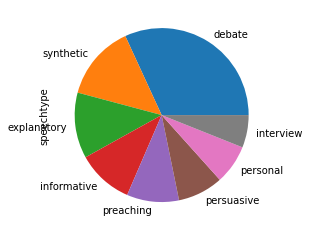

In [18]:
df.speechtype.value_counts().plot(kind='pie')

Plot a diagram with all the different speakertypes.

<AxesSubplot:ylabel='speakertype'>

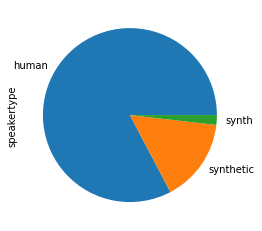

In [19]:
df.speakertype.value_counts().plot(kind='pie')

Plot a diagram wit all the different ages.

<AxesSubplot:ylabel='age'>

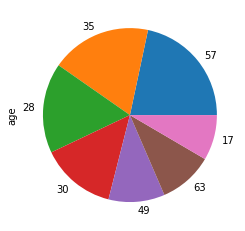

In [20]:
df.age.value_counts().plot(kind='pie')

Plot a diagram with the different languages.

<AxesSubplot:ylabel='lang'>

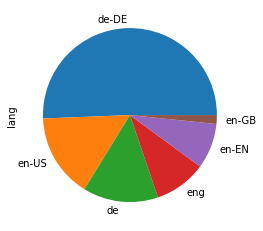

In [21]:
df.lang.value_counts().plot(kind='pie')

Plot a diagram with the different names.

<AxesSubplot:ylabel='id'>

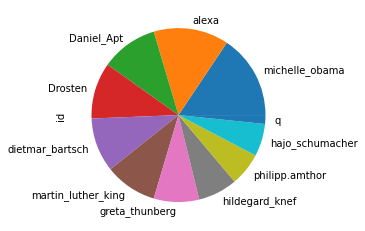

In [22]:
df.id.value_counts().plot(kind='pie')

Create new data frame with spreechtype preaching and debate.

In [23]:
df_preach = df[df.speechtype=='preaching']
df_debate = df[df.speechtype=='debate']

Following function returns the features for data frame preaching and debate.

In [24]:
def get_feats_st(df):
    return mld_df[mld_df.index.isin(df.index)]
feats_preach = get_feats_st(df_preach)
feats_debate = get_feats_st(df_debate)

In [25]:
feats_preach.shape

(77, 580)

Plot of the speech rate. There is a higher speech rate in debating than in preaching.

<AxesSubplot:>

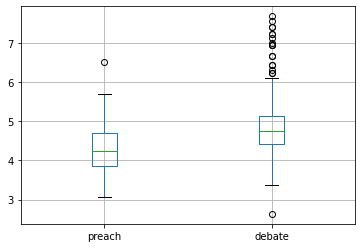

In [26]:
pd.concat([feats_preach['hld_sylRate'].rename('preach'), 
           feats_debate['hld_sylRate'].rename('debate')], axis=1).boxplot()

Create new data frame with speapertype human and synthetic.

In [27]:
df_human = df[df.speakertype=='human']
df_synthetic = df[df.speakertype=='synthetic']

The following function returns the features for data frame human and synthetic.

In [28]:
def get_feats_speakertype(df):
    return mld_df[mld_df.index.isin(df.index)]
feats_human = get_feats_st(df_human)
feats_synthetic = get_feats_st(df_synthetic)

Plot of the speech rate. The speech rate of the speakertype synthetic and human are similarly fast but the synthetic voices have a larger range around the median. But the two cells after the boxplot show that the shape of the df_synthetic and df_alexa are the same. This means that in df_synthetic only df_alexa is contained.

<AxesSubplot:>

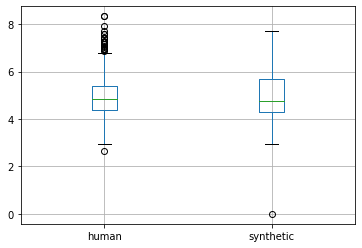

In [29]:
pd.concat([feats_human['hld_sylRate'].rename('human'), 
           feats_synthetic['hld_sylRate'].rename('synthetic')], axis=1).boxplot()

In [37]:
df_synthetic.shape

(111, 7)

In [36]:
df_alexa.shape

(111, 7)

Create new dataframe for data for the different speakers

In [50]:
df_q = df[df.id=='q']
df_alexa = df[df.id=='alexa']
df_obama = df[df.id=='michelle_obama']
df_schumacher = df[df.id=='hajo_schumacher']
df_amthor = df[df.id=='philipp.amthor']
df_knef = df[df.id=='hildegard_knef']
df_thunberg = df[df.id=='greta_thunberg']
df_king = df[df.id=='martin_luther_king']
df_bartsch = df[df.id=='dietmar_bartsch']
df_drosten = df[df.id=='Drosten']
df_apt = df[df.id=='Daniel_Apt']

Return the features for data frame for the speakers (ids)

In [51]:
def get_feats_id(df):
    return mld_df[mld_df.index.isin(df.index)]
feats_q = get_feats_id(df_q)
feats_alexa = get_feats_id(df_alexa)
feats_obama = get_feats_id(df_obama)
feats_schumacher = get_feats_id(df_schumacher)
feats_amthor = get_feats_id(df_amthor)
feats_knef = get_feats_id(df_knef)
feats_thunberg = get_feats_id(df_thunberg)
feats_king = get_feats_id(df_king)
feats_bartsch = get_feats_id(df_bartsch)
feats_drosten = get_feats_id(df_drosten)
feats_apt = get_feats_id(df_apt)

Create a boxplot that extracts the syllables per second for all the speakers an compares them

<AxesSubplot:>

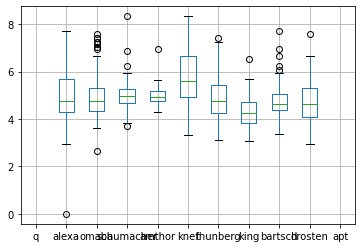

In [52]:
pd.concat([feats_q['hld_sylRate'].rename('q'), 
           feats_alexa['hld_sylRate'].rename('alexa'), 
           feats_obama['hld_sylRate'].rename('omaba'), 
           feats_schumacher['hld_sylRate'].rename('schumacher'), 
           feats_amthor['hld_sylRate'].rename('amthor'), 
           feats_knef['hld_sylRate'].rename('knef'), 
           feats_thunberg['hld_sylRate'].rename('thunberg'), 
           feats_king['hld_sylRate'].rename('king'), 
           feats_bartsch['hld_sylRate'].rename('bartsch'), 
           feats_drosten['hld_sylRate'].rename('drosten'), 
           feats_apt['hld_sylRate'].rename('apt'),], axis=1).boxplot()

In [54]:
voices=[feats_q, feats_alexa, feats_obama, feats_schumacher, feats_amthor, feats_knef, feats_thunberg, feats_king, feats_bartsch, feats_drosten, feats_apt]
speech_rate=[hld_sylRate]

plt.bar(voices,speech_rate)

NameError: name 'hld_sylRate' is not defined

Create new dataframe for data for the speechtypes informative and persuasive.

In [46]:
df_informative = df[df.speechtype=='informative']
df_persuasive = df[df.speechtype=='persuasive']

Following function returns the features for the data frames informative and persuasive

In [47]:
def get_feats_speakertype_inf_pers(df):
    return mld_df[mld_df.index.isin(df.index)]
feats_informative = get_feats_st(df_informative)
feats_persuasive = get_feats_st(df_persuasive)

Create a boxplot that compares the pause proportion in the segments of the informative and the persuasive speeches.

<AxesSubplot:>

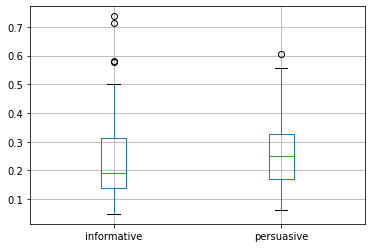

In [48]:
pd.concat([feats_informative['hld_gapRel'].rename('informative'), 
           feats_persuasive['hld_gapRel'].rename('persuasive'),], axis=1).boxplot()

In [ ]:
df.plot(x="Name", y="Age", kind="bar")